#**Langchain으로 Chat Model의 응답 받기**
>Chat Model Documents: https://python.langchain.com/v0.2/docs/integrations/chat/



In [ ]:

from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

# .env 파일로부터 환경 불러오기
load_dotenv() #.env 파일엔 chat model들의 api key가 정의되어 있음

# ChatOpenAI model 호출하기
model = ChatOpenAI(model="gpt-4o")

# model에게 질문의 답 호출
result = model.invoke("What is 81 divided by 9?") # 81 / 9 에 대한 응답을 호출
print("Full result:")
print(result) # model은 답변 뿐만 아니라 사용한 token과 같은 여러 메타데이터들을 같이 제공
print("Content only:")
print(result.content) # 질문에 대한 응답만을 출력


실행 결과:

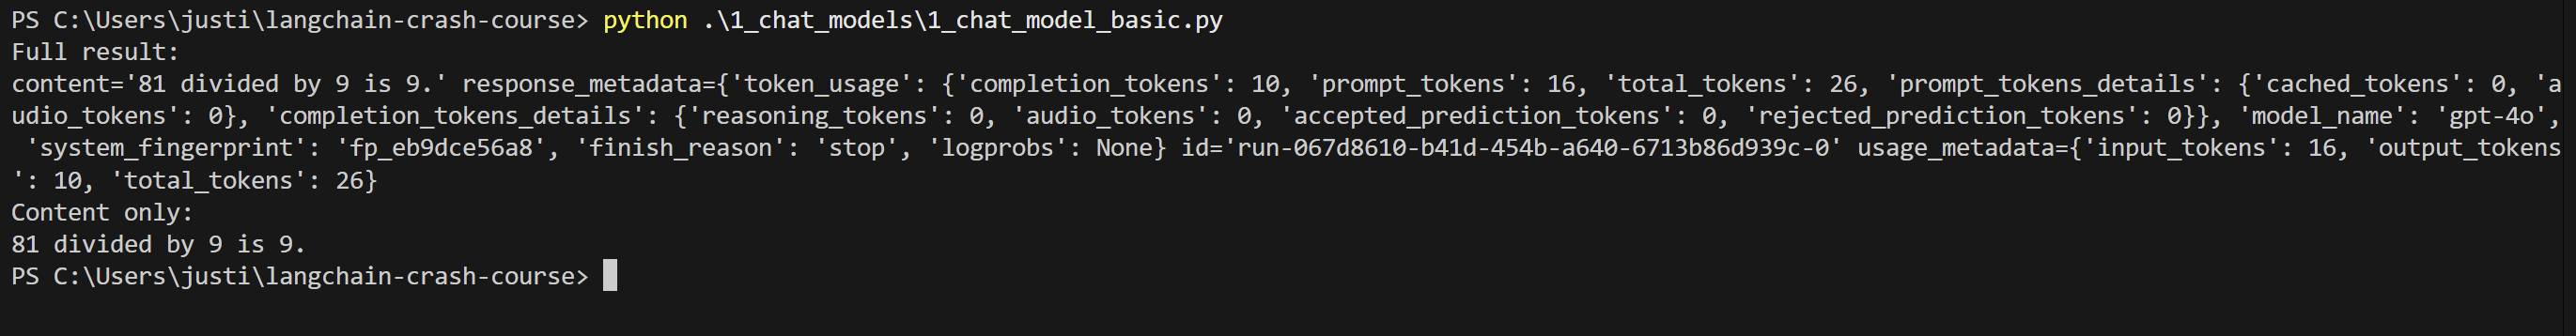

#**Chat Model과 대화하기**

In [ ]:
from dotenv import load_dotenv
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI

# .env 파일로부터 환경 불러오기
load_dotenv()

# ChatOpenAI model 호출하기
model = ChatOpenAI(model="gpt-4o")


# SystemMessage란?:
#   AI의 행동을 사전에 규정하는 메시지. 메시지들 중 가장 먼저 제공되어야 함.
# HumanMessagse란?:
#   인간 --(메시지)--> AI
messages = [
    SystemMessage(content="Solve the following math problems"), # SystemMessage로 AI로 하여금 수학 문제를 풀도록 규정함.
    HumanMessage(content="What is 81 divided by 9?"), # HumanMessage: 81 / 9 는 무엇이지?
]

# model에게 질문의 답 호출
result = model.invoke(messages)
print(f"Answer from AI: {result.content}")


# AIMessage란?:
#   AI --(메시지)--> 인간
messages = [
    SystemMessage(content="Solve the following math problems"), # SystemMessage로 AI로 하여금 수학 문제를 풀도록 규정함.
    HumanMessage(content="What is 81 divided by 9?"), # HumanMessage: 81 / 9 는 무엇이지?
    AIMessage(content="81 divided by 9 is 9."), # AIMessage : 81 나누기 9는 9입니다.
    HumanMessage(content="What is 10 times 5?"), # HumanMessage: 10 곱하기 5는?
]  # AI와의 대화를 리스트에 저장해 model에게 계속해서 문제의 맥락을 제공함

# model에게 질문의 답 호출
result = model.invoke(messages)
print(f"Answer from AI: {result.content}")

실행 결과:

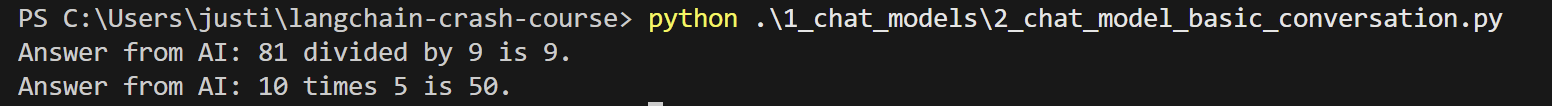

#**여러 Chat Model 호출하기**
> 사용 전 api key를 .env 파일에 등록해야 함

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI # Gemini
from langchain_anthropic import ChatAnthropic # claude
from langchain_openai import ChatOpenAI # ChatGPT
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage, SystemMessage

load_dotenv()

messages = [
    SystemMessage(content="Solve the following math problems"),
    HumanMessage(content="What is 81 divided by 9?"),
]


# ---- LangChain OpenAI Chat Model 예시 ----

# ChatOpenAI model 호출 (gpt-4o)
model = ChatOpenAI(model="gpt-4o")

# model에게 질문의 답 호출
result = model.invoke(messages)
print(f"Answer from OpenAI: {result.content}")


# ---- Anthropic Chat Model 예시 ----

# Anthropic model 호출 (claude-3-opus) --- https://docs.anthropic.com/en/docs/models-overview
model = ChatAnthropic(model="claude-3-opus-20240229")

result = model.invoke(messages)
print(f"Answer from Anthropic: {result.content}")


# ---- Google Chat Model 예시 ----

# Google model 호출 (Gemini 1.5 flash)
# https://console.cloud.google.com/gen-app-builder/engines
# https://ai.google.dev/gemini-api/docs/models/gemini
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

result = model.invoke(messages)
print(f"Answer from Google: {result.content}")


실행 결과:
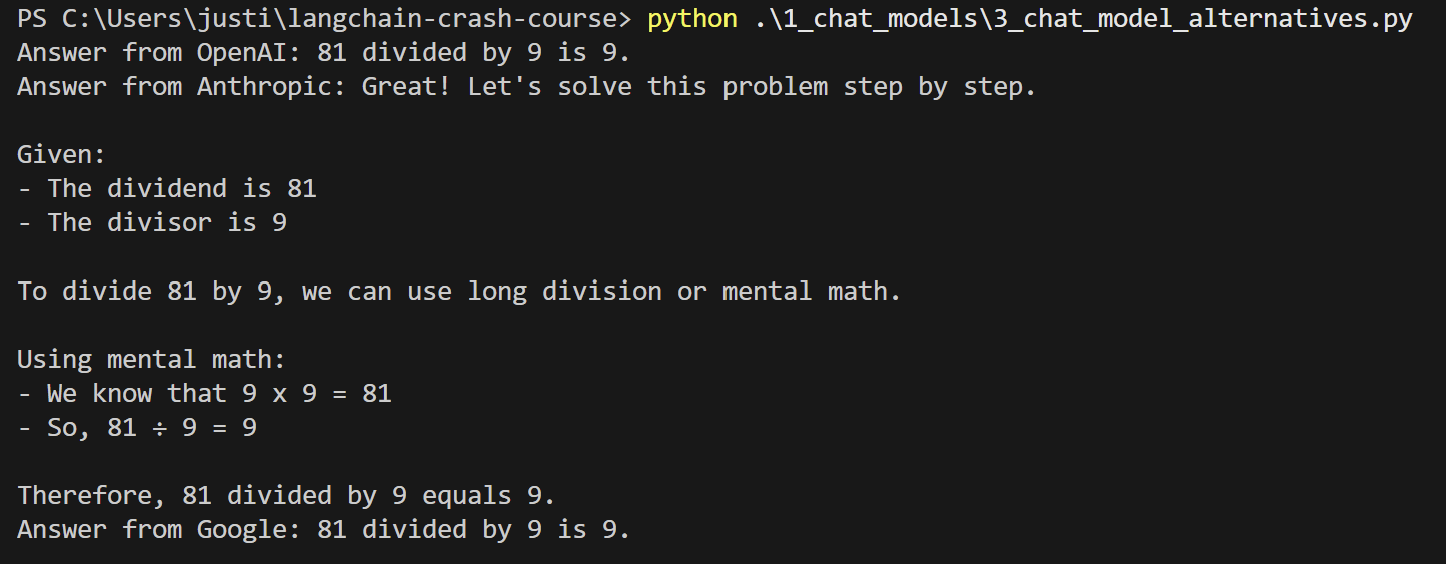

#**사용자와 대화하는 chat model**

In [ ]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

load_dotenv()

model = ChatOpenAI(model="gpt-4o")


chat_history = []  # list 자료형 활용해 대화 기록을 저장함

# 사전 SystemMessage 설정 (선택)
system_message = SystemMessage(content="You are a helpful AI assistant.") # SystemMessage로 model을 "유능한 AI 조수"로 규정함
chat_history.append(system_message)  # SystemMessage를 chat_history 리스트에 추가함

# Chat loop
while True:
    query = input("You: ") # 사용자의 응답을 query에 저장
    if query.lower() == "exit": # 사용자가 exit을 입력하면 루프 탈출
        break
    chat_history.append(HumanMessage(content=query))  # chat_history 리스트에 HumanMessage 추가

    # Get AI response using history
    result = model.invoke(chat_history)
    response = result.content
    chat_history.append(AIMessage(content=response))  # chat_history 리스트에 AIMessage 추가

    print(f"AI: {response}")


print("---- Message History ----") # chat_history 리스트 출력
print(chat_history)


실행 결과:
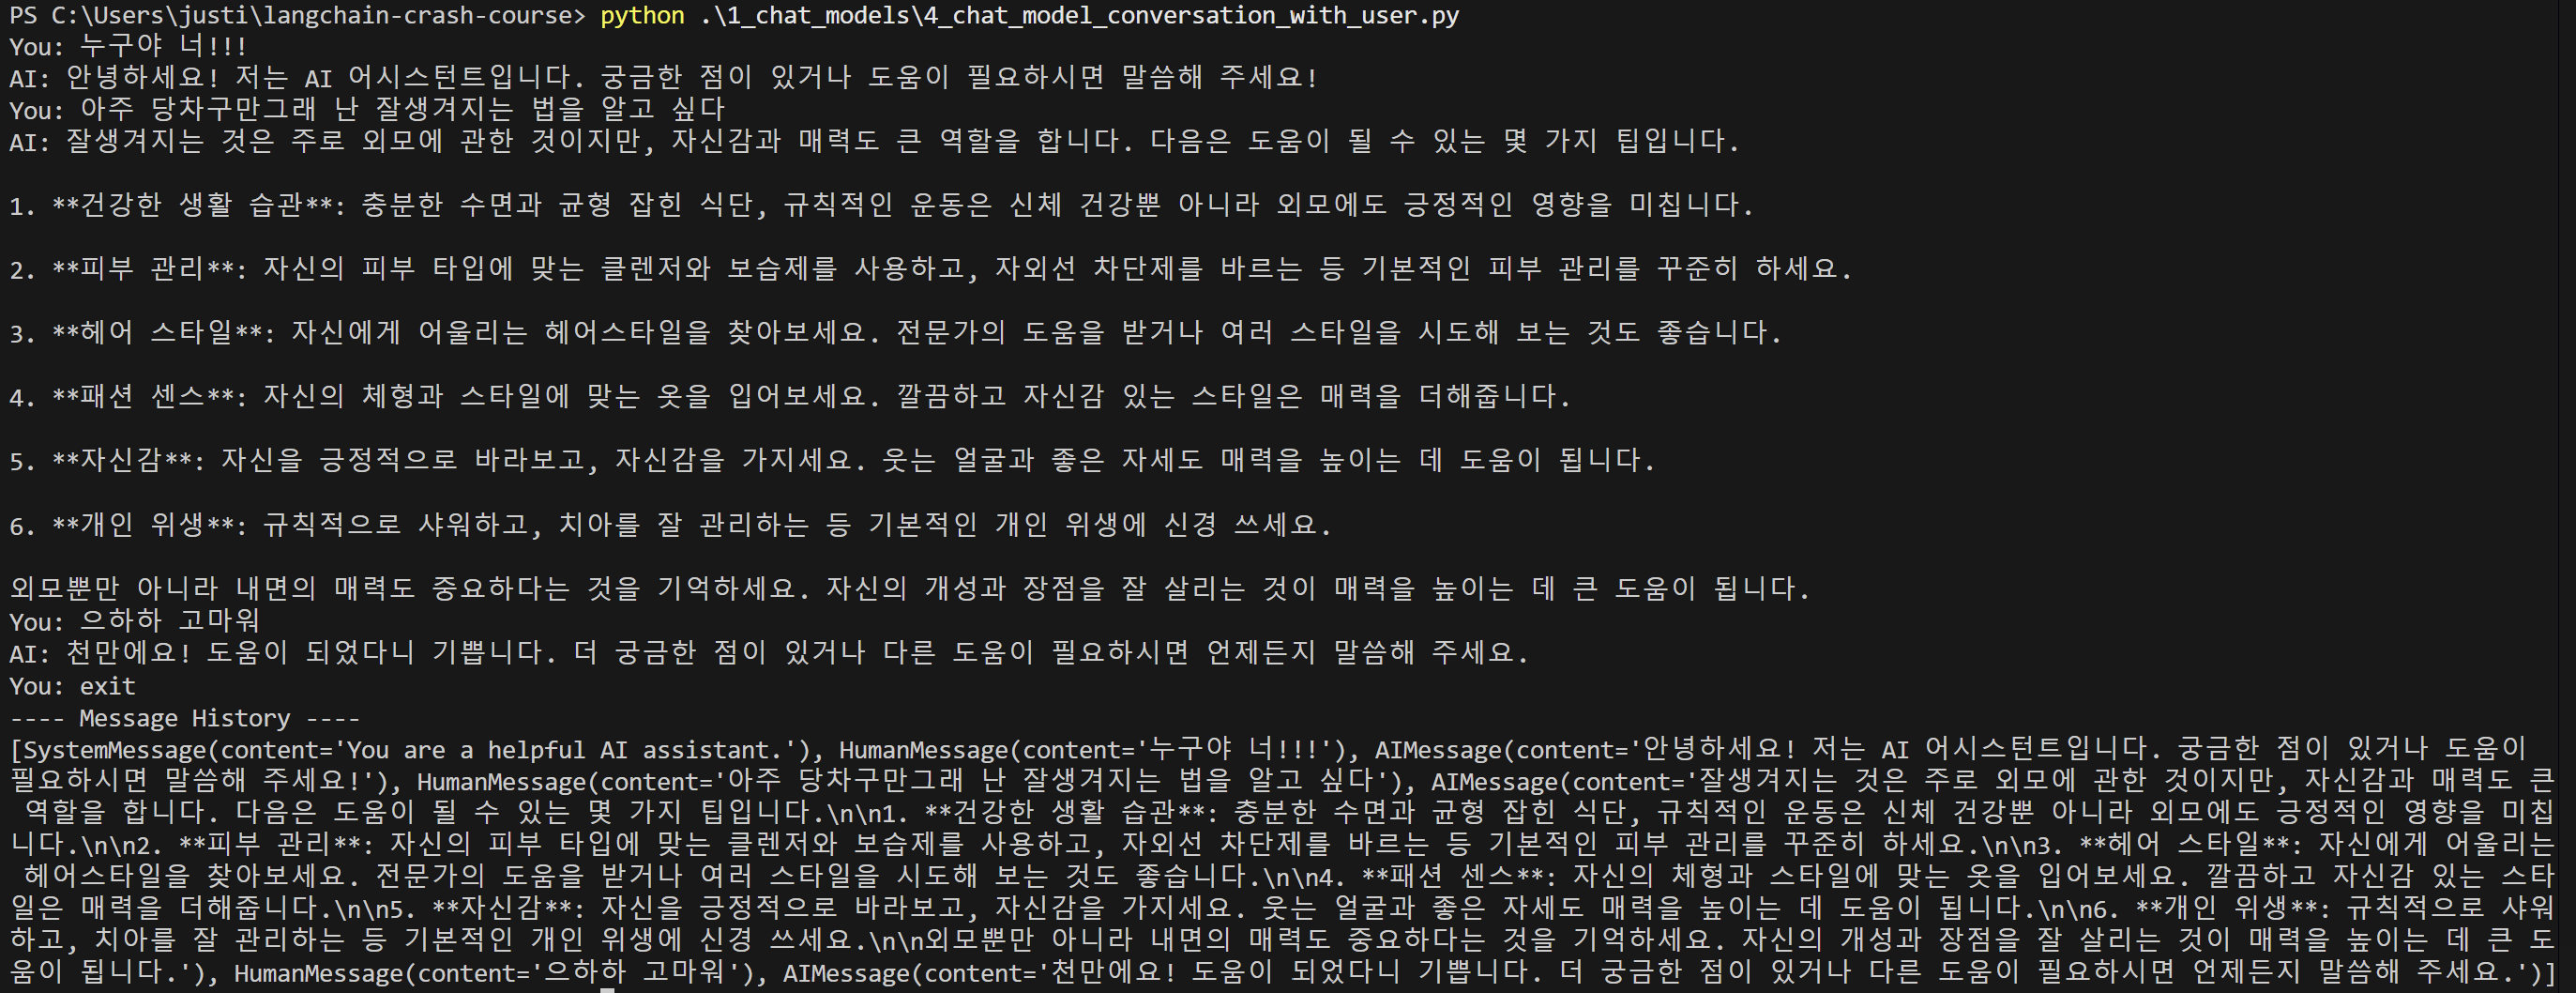

#**서버에 채팅 기록 저장하기**
>사전 절차:
1. Firebase 계정 만들기
2. 새로운 Firebase project 만들기
    - project ID 복사해놓기
3. Firebase project에 Firestore database 생성하기
4. 컴퓨터에 Google Cloud CLI 설치하기
    - https://cloud.google.com/sdk/docs/install
    - 구글 계정으로 Google Cloud CLI 인증하기
        - https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev
    - 2에서 만들었던 Firebase project를 기본 project로 설정하기
5. Google Cloud Console에서 Firestore API 활성화하기:
    - https://console.cloud.google.com/apis/enableflow?apiid=firestore.googleapis.com&project=crewai-automation

In [ ]:
from dotenv import load_dotenv
from google.cloud import firestore
from langchain_google_firestore import FirestoreChatMessageHistory
from langchain_openai import ChatOpenAI

load_dotenv()

# Firebase Firestore 설정하기
PROJECT_ID = ""
SESSION_ID = ""
COLLECTION_NAME = ""

# Firestore Client 초기화
print("Initializing Firestore Client...")
client = firestore.Client(project=PROJECT_ID)

# Firestore Chat Message 기록 초기화
print("Initializing Firestore Chat Message History...")
chat_history = FirestoreChatMessageHistory(
    session_id=SESSION_ID,
    collection=COLLECTION_NAME,
    client=client,
)
print("Chat History Initialized.")
print("Current Chat History:", chat_history.messages)

model = ChatOpenAI()

print("Start chatting with the AI. Type 'exit' to quit.")

while True:
    human_input = input("User: ")
    if human_input.lower() == "exit":
        break

    chat_history.add_user_message(human_input) # Firestore에 사용자 응답 추가

    ai_response = model.invoke(chat_history.messages)
    chat_history.add_ai_message(ai_response.content) # Firestore에 AI 응답 추가

    print(f"AI: {ai_response.content}")


실행 결과:
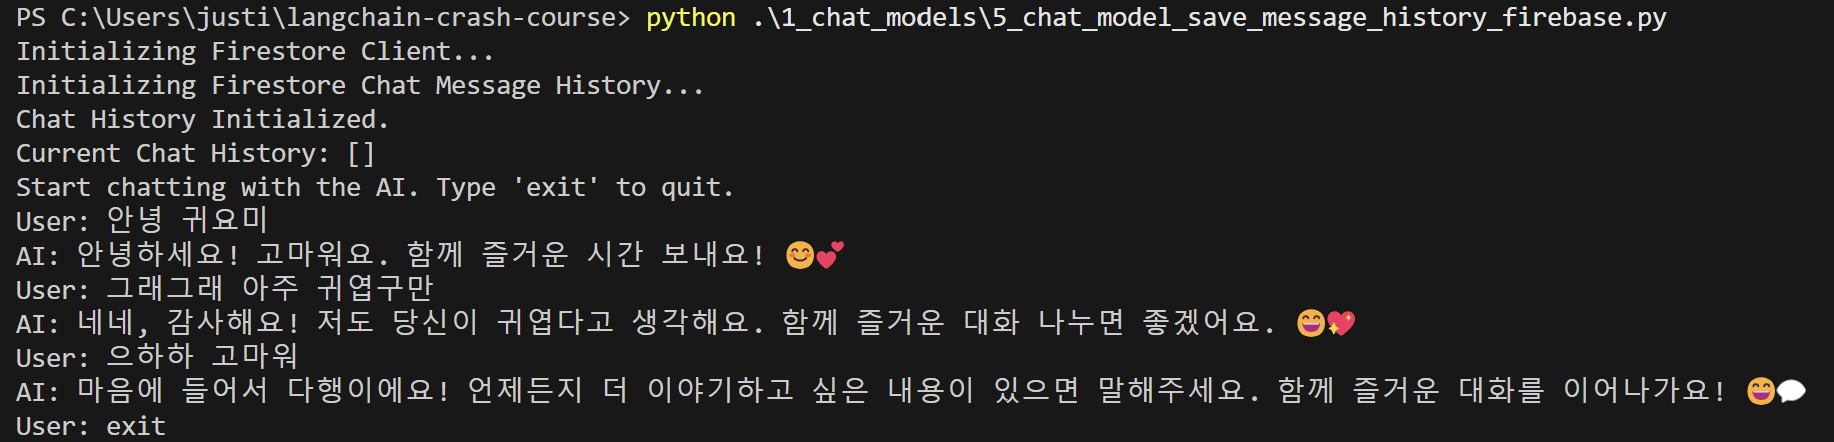

Firestore 서버:
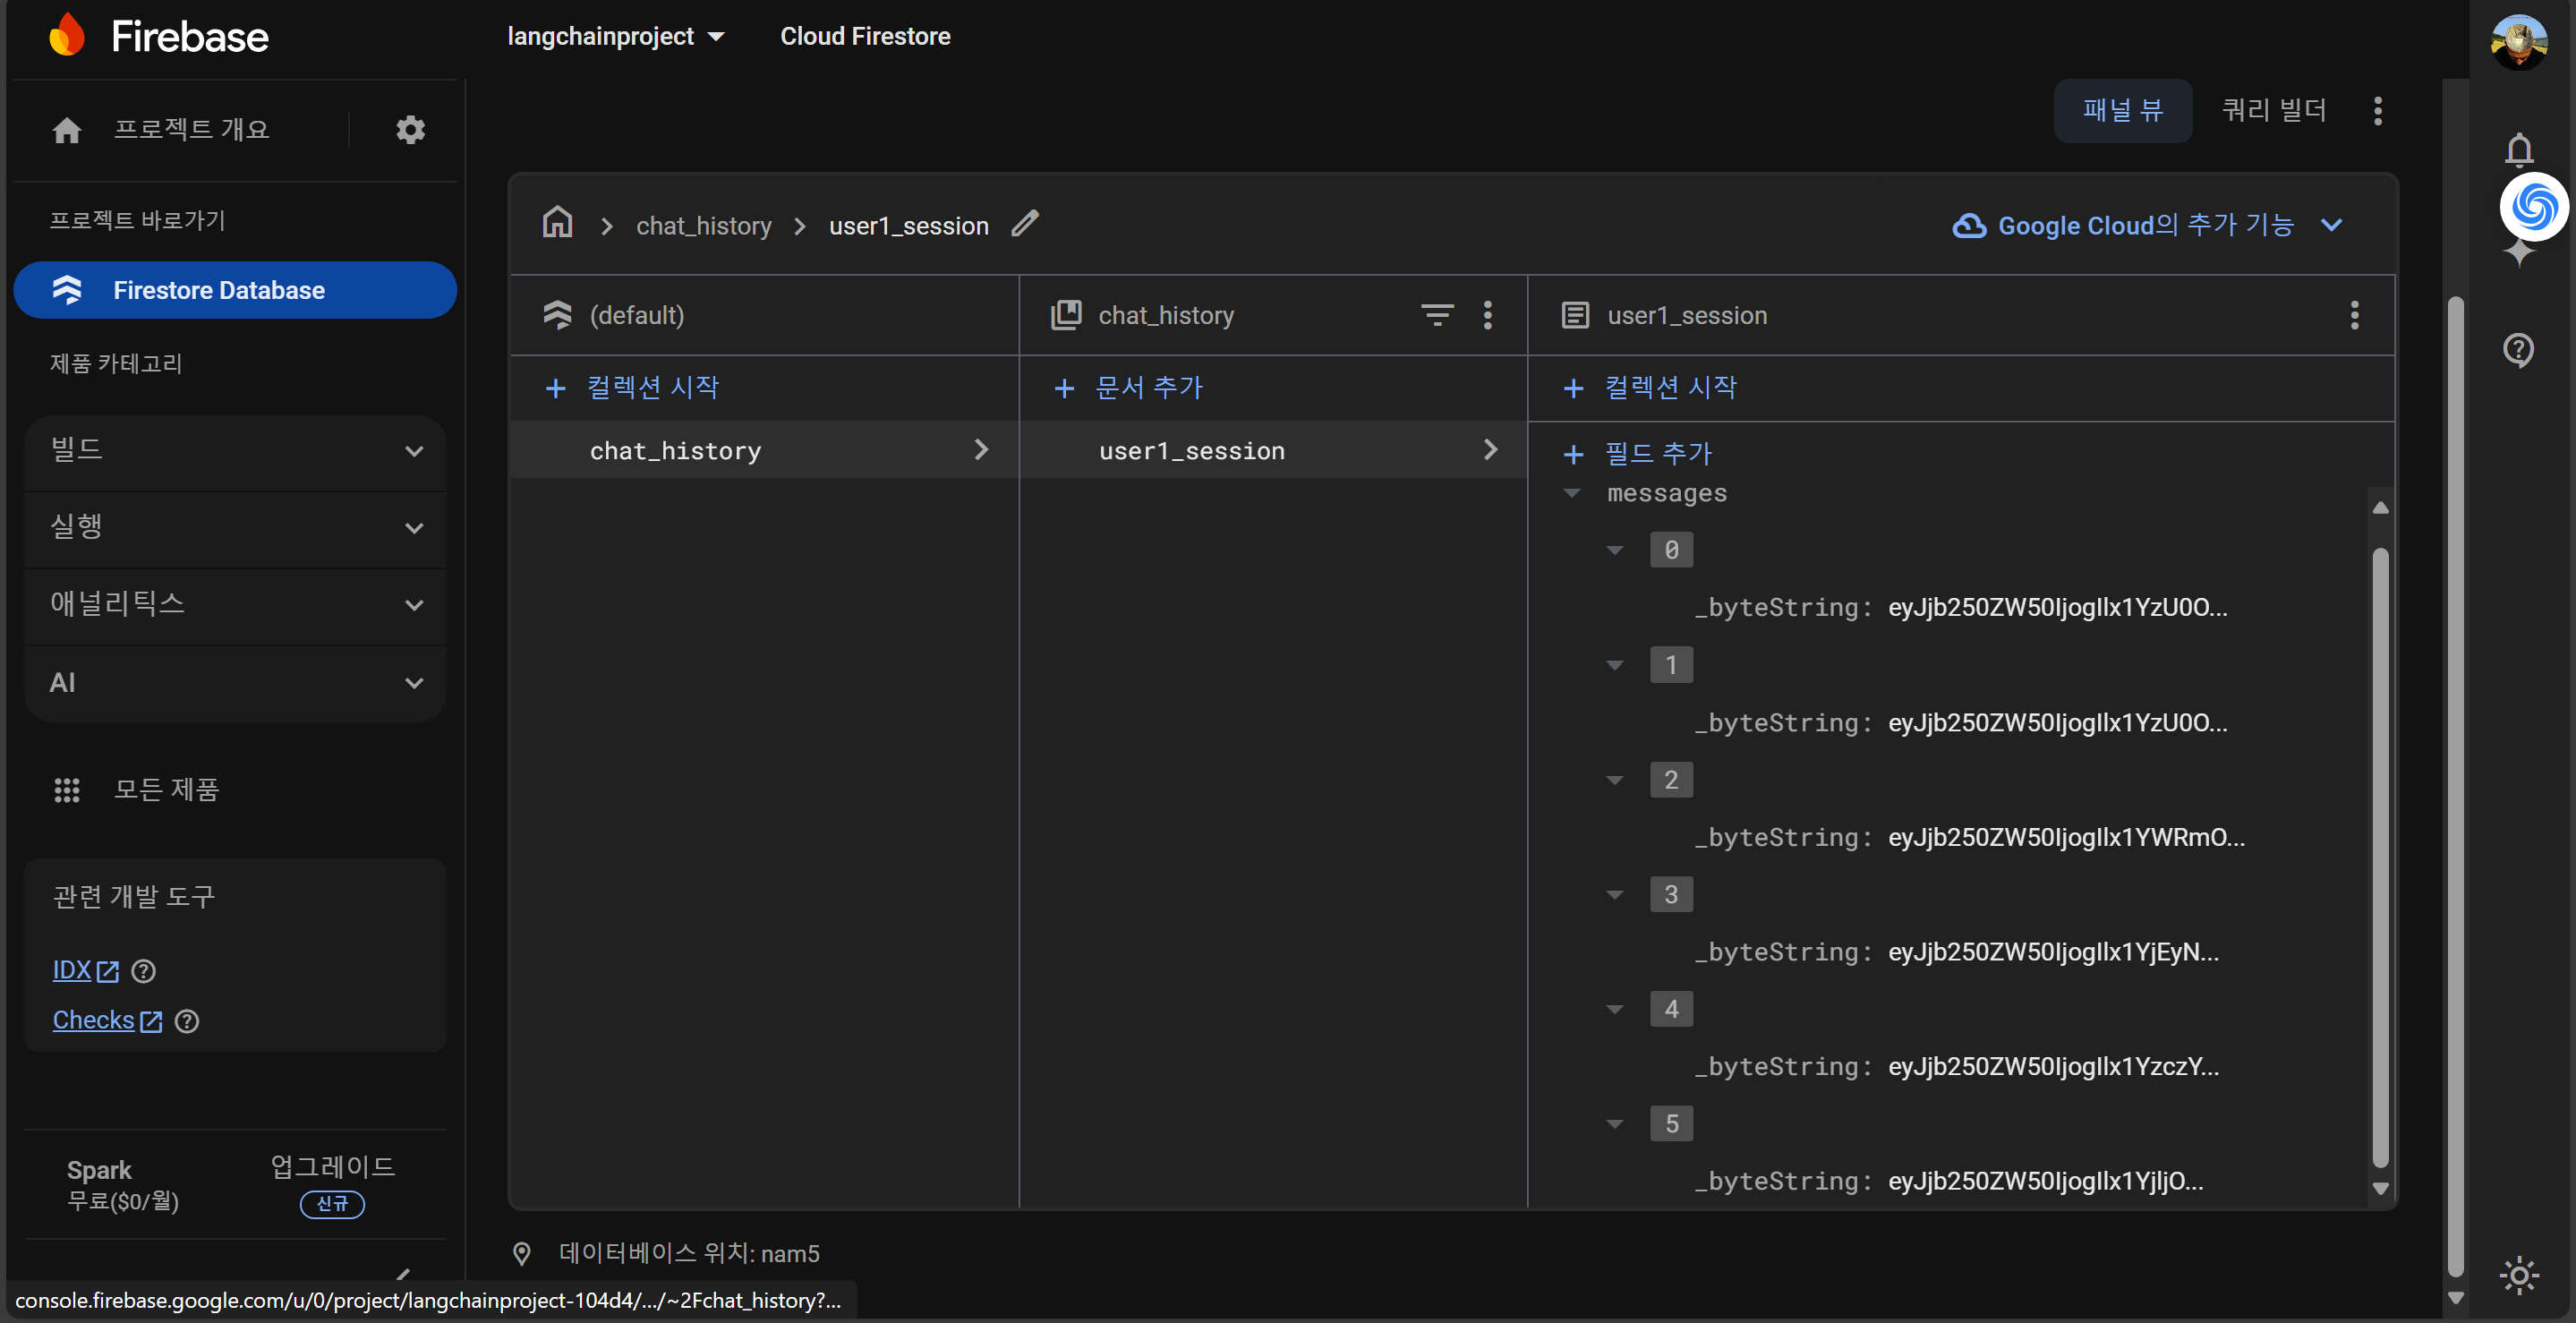

익일 실행 결과:
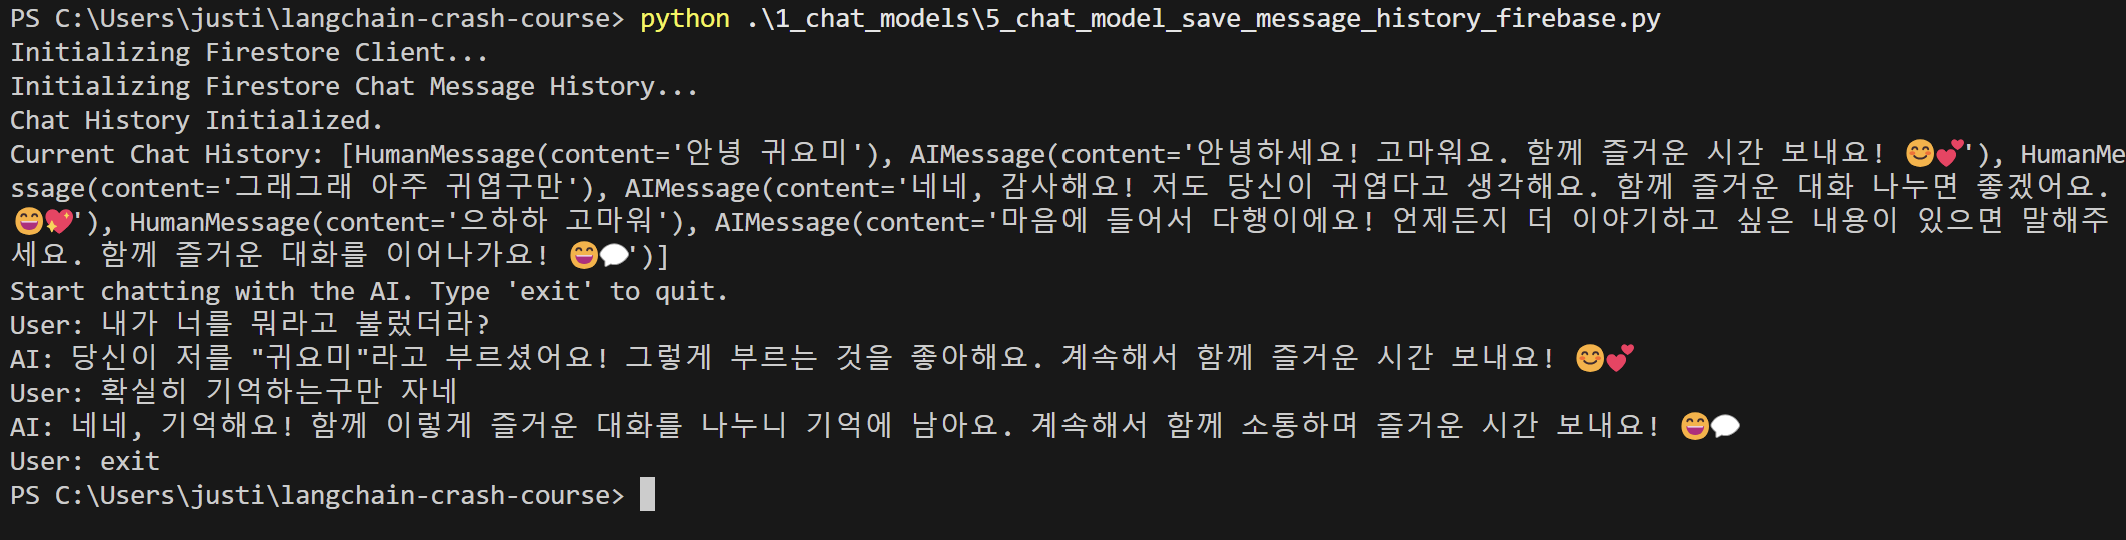